In [1]:
import random
from datamatrix import get_init_matrix
from KNN import KNearestNeighbour
import numpy as np
import matplotlib.pyplot as plt
from random_recommendations import RecommendRandom
from mean_recommendations import RecommendMean

In [8]:
init_matrix = get_init_matrix()

recommender6 = RecommendRandom()
recommender7 = RecommendMean()

recommenders = []
for measure in ["cosine", "euclidean","manhattan","correlation"]:
    recommender =  KNearestNeighbour(k = 50, sim_treshold = 0, measure = measure, show = False, mean= True)
    recommender.init_data(init_matrix)
    recommenders.append([measure, recommender])

recommender7.init_data(init_matrix)
recommenders.append(["random",recommender6])
recommenders.append(["mean",recommender7])


In [3]:
def evaluation(init_matrix, recommender):
    number_of_evaluations = 10
    user_IDs_evaluation = random.sample(range(6040), number_of_evaluations)
    threshold = 3
    
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    
    for i in range(number_of_evaluations):
        target_user = user_IDs_evaluation[i]
        
        movie_ID_array = np.arange(1, 3953, 1)
        
        target_user_movie_ratings = init_matrix[target_user]
        target_user_rated_movies = np.vstack((movie_ID_array, target_user_movie_ratings))
           
        target_user_movieID_ratings = []
        for j in range(len(movie_ID_array)):
            if target_user_rated_movies[1][j] != 0:
                target_user_movieID_ratings.append(target_user_rated_movies[0][j])
                target_user_movieID_ratings.append(target_user_rated_movies[1][j])
        
        number_of_evaluated_movies = int(len(target_user_movieID_ratings)*0.2)
        
        target_user_movieID_ratings = np.array(target_user_movieID_ratings)
        target_user_movieID_ratings = target_user_movieID_ratings.reshape(int(len(target_user_movieID_ratings)/2), 2)

        target_user_movieID = target_user_movieID_ratings[:,0]
        target_movies = random.sample(list(target_user_movieID), number_of_evaluated_movies)
        target_movies = np.array(target_movies).astype(int)

        estimated_target_movie_ratings_normalized = recommender.get_ratings(targetid=target_user, targetmovies=target_movies)

        for k in range(len(target_movies)):
            if init_matrix[target_user][target_movies[k] - 1] > threshold and estimated_target_movie_ratings_normalized[k][1] > threshold:
                true_positive += 1
            elif init_matrix[target_user][target_movies[k] - 1] < threshold and estimated_target_movie_ratings_normalized[k][1] > threshold:
                false_positive += 1
            elif init_matrix[target_user][target_movies[k] - 1] < threshold and estimated_target_movie_ratings_normalized[k][1] < threshold:
                true_negative += 1
            else:
                false_negative += 1
                
    recall = (true_positive / (true_positive + true_negative))
    precision = (true_positive / (true_positive + false_positive))
    accuracy = ((true_positive + false_negative) / (true_negative + true_positive + false_negative + false_positive))
                
    return np.array([recall,precision,accuracy])


In [4]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

['cosine', <KNN.KNearestNeighbour object at 0x000001BAC0ED2CF8>]
['euclidean', <KNN.KNearestNeighbour object at 0x000001BAC0ED2D68>]
['manhattan', <KNN.KNearestNeighbour object at 0x000001BAC0ED2A58>]
['correlation', <KNN.KNearestNeighbour object at 0x000001BAC0FDBB70>]
['random', <random_recommendations.RecommendRandom object at 0x000001BAC0ED2C50>]
['mean', <mean_recommendations.RecommendMean object at 0x000001BAC0ED2C88>]


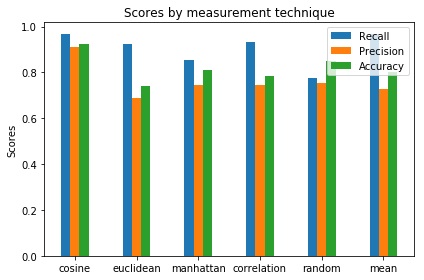

In [9]:

labels = []
recalls = []
precisions = []
accuracys = []
for test in recommenders:
    print(test)
    results = evaluation(init_matrix, test[1])
    rec,prec,acc = results
    labels.append(test[0])
    recalls.append(rec)
    precisions.append(prec)
    accuracys.append(acc)

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots() 
rects1 = ax.bar(x - width , recalls, width, label='Recall')
rects2 = ax.bar(x, precisions, width, label='Precision')
rects3 = ax.bar(x + width, accuracys, width, label='Accuracy')

ax.set_ylabel('Scores')
ax.set_title('Scores by measurement technique')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
        